In [1]:
import pandas as pd
import numpy as np
import os
from libraries import hide_toggle
import seaborn as sns
from matplotlib import pyplot as plt

# Tables des matières

# 1. Selection de la population et des individus
# 2. Sélection des attributs avec la méthode PESTEL
   **2.1** [Croissance démographique moyenne](#21)    
   **2.2** [Stabilité politique moyenne (2000-2018)](#22)  
   2.3 [Evolution du PIB moyen (1961 - 2021)](#23)  
   2.4 [Les écarts moyen sur le revenu des ménages (1960 - 2021)](#24)  
   2.5 [Les emissions de CO2 (1960 - 2018)](#25)  
   2.6 [Les décès liés à la sous-nutrition (1960 - 2021)](#26)  

In [2]:
main_data = pd.read_csv("Data Source/DisponibiliteAlimentaire_2017.csv")

In [3]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [4]:
main_data.head(5)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [5]:
rm_columns=["Code Domaine","Domaine","Code zone","Code Élément","Code Produit","Code année","Description du Symbole","Symbole"]
main_data.drop(columns=rm_columns, inplace=True)

In [6]:
main_data.isna().sum()

Zone       0
Élément    0
Produit    0
Année      0
Unité      0
Valeur     0
dtype: int64

## Selection de la population et des individus

In [7]:
main_data["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [8]:
# On récupère les données ciblées sur le poulet
volaille_data = main_data.loc[main_data["Produit"] == "Viande de Volailles", :]

In [9]:
# Création des variables quantitatives
volaille_data = pd.pivot_table(volaille_data, index=["Zone","Année"], columns="Élément")

In [10]:
volaille_data[("Valeur")].columns


Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [11]:
volaille_data["Valeur"].isna().sum()

Élément
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                                                            8
Semences                  

In [12]:
volaille_data=volaille_data["Valeur"].reset_index()

In [13]:
# Réduction de dimension grâce aux valeurs nulles et manquantes
rm_columns = ["Pertes","Semences","Résidus","Traitement","Variation de stock","Aliments pour animaux",
              "Autres utilisations (non alimentaire)","Alimentation pour touristes"]

In [14]:
volaille_data.drop(columns=rm_columns, inplace=True)

In [15]:
volaille_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 11 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           172 non-null    object 
 1   Année                                                          172 non-null    int64  
 2   Disponibilité alimentaire (Kcal/personne/jour)                 172 non-null    float64
 3   Disponibilité alimentaire en quantité (kg/personne/an)         172 non-null    float64
 4   Disponibilité de matière grasse en quantité (g/personne/jour)  172 non-null    float64
 5   Disponibilité de protéines en quantité (g/personne/jour)       172 non-null    float64
 6   Disponibilité intérieure                                       170 non-null    float64
 7   Exportations - Quantité                                       

In [16]:
volaille_data.head()

Élément,Zone,Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production
0,Afghanistan,2017,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,28.0
1,Afrique du Sud,2017,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,1667.0
2,Albanie,2017,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,13.0
3,Algérie,2017,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,275.0
4,Allemagne,2017,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,1514.0


# 2. Selection des attributs de nos individus avec l'analyse PESTEL

In [17]:
# Politique : Stabilité politique générale d'un gouvernement 
# Economie : Evolution du PIB, Niveau de vie des habitants(revenu moyen)
# Sociale : Croissance démographique
# Marché agricole: Production, Dispo Alimentaire, importations, exportations
# Ecologique : Pollution, traitement des déchets (gaspillage), distance entre pays



## 2.1 Croissance démographique moyenne <a name="21"></a>

In [18]:
pop = pd.read_csv("Data Source/Population_2000_2018.csv")

In [19]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [20]:
selected_columns=["Zone","Année","Valeur"]
pop = pop[selected_columns]
pop.columns = ["Pays","Année","Population"]

In [21]:
pop.head(5)

,Pays,Année,Population
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684


In [22]:
pop["Population"]

0       20779.953
1       21606.988
2       22600.770
3       23680.871
4       24726.684
          ...    
4406    13586.707
4407    13814.629
4408    14030.331
4409    14236.595
4410    14438.802
Name: Population, Length: 4411, dtype: float64

In [23]:
pop[pop["Pays"] == "Afghanistan"]["Population"]

0     20779.953
1     21606.988
2     22600.770
3     23680.871
4     24726.684
5     25654.277
6     26433.049
7     27100.536
8     27722.276
9     28394.813
10    29185.507
11    30117.413
12    31161.376
13    32269.589
14    33370.794
15    34413.603
16    35383.032
17    36296.113
18    37171.921
Name: Population, dtype: float64

In [24]:
pop_delta = np.diff(pop[pop["Pays"] == "Afghanistan"]["Population"],prepend=0)

In [25]:
def demographic_growth(df, pays):
    # Calcul le delta de population d'une année à l'autre pour un pays
    pop_delta = np.diff(df[df["Pays"] == pays]["Population"],prepend=0)
    pop_ref = np.cumsum(pop_delta)
    growth_pop = [0]
    for i in range(1,len(pop_delta)):
        absolute_growth = round((pop_delta[i] / pop_ref[i-1]),3)
        growth_pop.append(absolute_growth)
    return growth_pop

In [26]:
# Calcul la croissance démographique pour tous les pays
growth_pop = []
for pays in pop["Pays"].unique():
    growth_pop.append(demographic_growth(pop,pays))


In [27]:
pop["croissance demo"] = np.concatenate(growth_pop)

In [28]:
pop.head(20)

,Pays,Année,Population,croissance demo
0,Afghanistan,2000,20779.953,0.000
1,Afghanistan,2001,21606.988,0.040
2,Afghanistan,2002,22600.770,0.046
3,Afghanistan,2003,23680.871,0.048
4,Afghanistan,2004,24726.684,0.044
5,Afghanistan,2005,25654.277,0.038
6,Afghanistan,2006,26433.049,0.030
7,Afghanistan,2007,27100.536,0.025
8,Afghanistan,2008,27722.276,0.023
9,Afghanistan,2009,28394.813,0.024


### Qualité des données

In [29]:
# Fonction test sur les valeurs temporelles manquantes pour chaque pays
def time_period_test(df, period_column_name, country_columns_name, data_quality_rate=80):
    
    df = df[[country_columns_name, period_column_name]].drop_duplicates()
    min_period = df.describe()[period_column_name]["min"]
    max_period = df.describe()[period_column_name]["max"]
    period_length = (max_period - min_period) + 1
    print(period_length)
    intervalle_df = df.groupby(by=[country_columns_name]).agg({period_column_name : "count"}).rename(columns={period_column_name : "Intervalle"})["Intervalle"].reset_index()
    intervalle_df["année_inf"] = df.groupby(by=[country_columns_name]).agg({period_column_name : "min"}).reset_index()[period_column_name]
    intervalle_df["année_sup"] = df.groupby(by=[country_columns_name]).agg({period_column_name : "max"}).reset_index()[period_column_name]
    intervalle_df["qualité (%)"] = round(intervalle_df["Intervalle"] / period_length,3)*100
    print("Maximum time period length : {} - {}".format(round(min_period), round(max_period)))
    return intervalle_df.loc[intervalle_df["qualité (%)"] > data_quality_rate, :]

In [30]:
# Taux d'information sur la periode 2000 - 2018
time_period_test(pop,"Année","Pays")

19.0
Maximum time period length : 2000 - 2018


,Pays,Intervalle,année_inf,année_sup,qualité (%)
0,Afghanistan,19,2000,2018,100.0
1,Afrique du Sud,19,2000,2018,100.0
2,Albanie,19,2000,2018,100.0
3,Algérie,19,2000,2018,100.0
4,Allemagne,19,2000,2018,100.0
...,...,...,...,...,...
233,Îles Salomon,19,2000,2018,100.0
234,Îles Turques-et-Caïques,19,2000,2018,100.0
235,Îles Vierges américaines,19,2000,2018,100.0
236,Îles Vierges britanniques,19,2000,2018,100.0


In [31]:
# calcul de la croissance démographique moyenne par pays
pop_final = pop.groupby(by=["Pays"], as_index=False).agg({"croissance demo" : "mean"})

In [32]:
from libraries import country_translate

In [33]:
pop_final["Country Name"] = country_translate(pop_final["Pays"])
pop_final.drop(columns="Pays", inplace=True)

## 2.2 Stabilité politique moyenne (2000-2018)

In [34]:
stab_pol = pd.read_csv("Data Source/PoliticalStability.csv")

In [35]:
stab_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3526 entries, 0 to 3525
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              3526 non-null   object 
 1   Year                 3526 non-null   int64  
 2   Political_Stability  3526 non-null   float64
 3   Granularity          3526 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 110.3+ KB


In [36]:
time_period_test(stab_pol, "Year", "Country")

19.0
Maximum time period length : 2000 - 2018


,Country,Intervalle,année_inf,année_sup,qualité (%)
0,Afghanistan,18,2000,2018,94.7
1,Albania,18,2000,2018,94.7
2,Algeria,18,2000,2018,94.7
4,Andorra,18,2000,2018,94.7
5,Angola,18,2000,2018,94.7
...,...,...,...,...,...
195,Venezuela (Bolivarian Republic of),18,2000,2018,94.7
196,Viet Nam,18,2000,2018,94.7
197,Yemen,18,2000,2018,94.7
198,Zambia,18,2000,2018,94.7


In [37]:
stab_pol.drop(columns=["Granularity"], inplace=True)

In [38]:
stab_pol_final = stab_pol.groupby(by=["Country"], as_index=False).agg({"Political_Stability" : "mean"})
stab_pol_final.rename(columns={"Country":"Country Name"}, inplace=True)

In [39]:
stab_pol_final.head(5)

,Country Name,Political_Stability
0,Afghanistan,-2.461111
1,Albania,-0.080556
2,Algeria,-1.216667
3,American Samoa,0.980000
4,Andorra,1.339444


## 2.3 Evolution du PIB moyen (1961 - 2021)

In [40]:
# Data source : World Bank
pib_mond=pd.read_csv("Data Source/GDP_mondial_growth.csv", header=2)

In [41]:
pib_mond.dropna(how="all", axis=1, inplace=True)
droped_columns = ["Country Code", "Indicator Name","Indicator Code"]
pib_mond.drop(columns=droped_columns, inplace=True)

In [42]:
pib_mond_final = pib_mond.melt(id_vars="Country Name", var_name="Année", value_name="GDP_growth (%)")##

In [43]:
pib_mond_final["Année"] = pd.to_numeric(pib_mond_final["Année"],errors="coerce")
pib_mond_final.dtypes
time_period_test(pib_mond_final,"Année", "Country Name")

61.0
Maximum time period length : 1961 - 2021


,Country Name,Intervalle,année_inf,année_sup,qualité (%)
0,Afghanistan,61,1961,2021,100.0
1,Africa Eastern and Southern,61,1961,2021,100.0
2,Africa Western and Central,61,1961,2021,100.0
3,Albania,61,1961,2021,100.0
4,Algeria,61,1961,2021,100.0
...,...,...,...,...,...
261,West Bank and Gaza,61,1961,2021,100.0
262,World,61,1961,2021,100.0
263,"Yemen, Rep.",61,1961,2021,100.0
264,Zambia,61,1961,2021,100.0


In [44]:
pib_mond_final = pib_mond_final.groupby(by=["Country Name"], as_index=False).agg({"GDP_growth (%)":"mean"})

## 2.4 Les écarts moyen sur le revenu des ménages (1960 - 2021)

In [45]:
pouv_achat = pd.read_csv("Data Source/Social_critera.csv")

In [46]:
pouv_achat

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Gini index,SI.POV.GINI,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,Afghanistan,AFG,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,Albania,ALB,Gini index,SI.POV.GINI,..,..,..,..,..,..,...,29,..,34.6,32.8,33.7,33.1,30.1,30.8,..,..
3,Albania,ALB,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,..,..,..,..,..,..,...,..,..,..,..,..,6.96,..,..,..,..
4,Algeria,DZA,Gini index,SI.POV.GINI,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,Data from database: Environment Social and Gov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
pouv_achat.replace({".." : np.nan}, inplace = True)

In [48]:
pouv_achat

,Country Name,Country Code,Series Name,Series Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,Afghanistan,AFG,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,ALB,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,29,NaN,34.6,32.8,33.7,33.1,30.1,30.8,NaN,NaN
3,Albania,ALB,Annualized average growth rate in per capita r...,SI.SPR.PCAP.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.96,NaN,NaN,NaN,NaN
4,Algeria,DZA,Gini index,SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,Data from database: Environment Social and Gov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
pouv_achat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country Name   480 non-null    object 
 1   Country Code   478 non-null    object 
 2   Series Name    478 non-null    object 
 3   Series Code    478 non-null    object 
 4   1960 [YR1960]  0 non-null      float64
 5   1961 [YR1961]  0 non-null      float64
 6   1962 [YR1962]  0 non-null      float64
 7   1963 [YR1963]  0 non-null      float64
 8   1964 [YR1964]  0 non-null      float64
 9   1965 [YR1965]  0 non-null      float64
 10  1966 [YR1966]  0 non-null      float64
 11  1967 [YR1967]  1 non-null      object 
 12  1968 [YR1968]  0 non-null      float64
 13  1969 [YR1969]  1 non-null      object 
 14  1970 [YR1970]  0 non-null      float64
 15  1971 [YR1971]  1 non-null      object 
 16  1972 [YR1972]  0 non-null      float64
 17  1973 [YR1973]  0 non-null      float64
 18  1974 [YR19

In [50]:
# Renomer les colonnes années :
mapper = {x : x.split(" ")[0] for x in pouv_achat.columns.values[4:]}
pouv_achat.rename(columns=mapper, inplace=True)

In [51]:
pouv_achat["Series Name"].value_counts()

Gini index                                                                                                   239
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)    239
Name: Series Name, dtype: int64

In [52]:
indice_gini = pouv_achat[pouv_achat["Series Name"] == "Gini index"].copy()
indice_gini.reset_index(drop=True, inplace=True)

In [53]:
# Suppression des colonnes qui ne seront pas "unpivot"
indice_gini.drop(columns=["Country Code","Series Name","Series Code"], inplace=True)

In [54]:
indice_gini

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29,NaN,34.6,32.8,33.7,33.1,30.1,30.8,NaN,NaN
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,51.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Latin America & Caribbean (IDA & IBRD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235,Middle East & North Africa (IDA & IBRD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,South Asia (IDA & IBRD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,Sub-Saharan Africa (excluding high income),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
indice_gini.isna().sum()

Country Name      0
1960            239
1961            239
1962            239
1963            239
               ... 
2017            164
2018            155
2019            181
2020            220
2021            238
Length: 63, dtype: int64

In [56]:
indice_gini_unpivot = indice_gini.melt(id_vars="Country Name", value_name="gini index", var_name="Année")
indice_gini_unpivot["gini index"] = pd.to_numeric(indice_gini_unpivot["gini index"])

In [57]:
indice_gini_final = indice_gini_unpivot.groupby(by=["Country Name"], as_index=False).agg({"gini index" : "mean"})

In [58]:
indice_gini_final

,Country Name,gini index
0,Afghanistan,NaN
1,Albania,31.218182
2,Algeria,34.366667
3,Andorra,NaN
4,Angola,48.666667
...,...,...
234,Vietnam,36.090909
235,World,NaN
236,"Yemen, Rep.",35.466667
237,Zambia,52.688889


In [59]:
indice_gini_final.sort_values('gini index', ascending=False).head(20)

,Country Name,gini index
196,South Africa,61.883333
152,Namibia,61.133333
34,Central African Republic,58.750000
23,Botswana,58.700000
209,Suriname,57.900000
18,Belize,57.733333
24,Brazil,56.522222
81,Guatemala,55.000000
63,Eswatini,54.925000
121,Lesotho,53.925000


## 2.5 Les emissions de CO2 (1960 - 2018)

In [60]:
CO2_emis = pd.read_csv("Data Source/CO2_worldly_emission.csv", header=2)

In [61]:
CO2_emis.drop(columns=["Unnamed: 66", "Country Code","Indicator Name","Indicator Code"], inplace=True)

In [62]:
CO2_emis

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.992616,1.005027,1.016649,0.966589,0.948410,0.937926,0.917507,0.913618,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,NaN,NaN
3,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.480603,0.508099,0.515960,0.494065,0.499405,0.483140,0.486456,0.493923,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.858491,1.106688,1.062211,0.511362,0.399364,0.359622,0.341068,0.380633,NaN,NaN
263,South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.077958,8.138264,8.212241,7.669938,7.563739,7.641675,7.515679,7.507736,NaN,NaN
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.278601,0.284058,0.304550,0.312355,0.325115,0.404068,0.445489,0.380717,NaN,NaN


In [63]:
CO2_emis_unpivot = CO2_emis.melt(id_vars="Country Name", var_name="Année", value_name="CO2 emission (ton/capita)")

In [64]:
CO2_emis_final = CO2_emis_unpivot.groupby(by=["Country Name"], as_index=False).agg({"CO2 emission (ton/capita)" : "mean"})
CO2_emis_final.head(5)

,Country Name,CO2 emission (ton/capita)
0,Afghanistan,0.116895
1,Africa Eastern and Southern,0.968398
2,Africa Western and Central,0.501364
3,Albania,1.250816
4,Algeria,3.021488


## 2.6 Les décès liés à la sous-nutrition (1960 - 2021)

In [65]:
sous_nut = pd.read_csv("Data Source/Death_nutrition_cause.csv", header=0)

In [66]:
sous_nut.drop(columns=["Series Name","Series Code","Country Code"], inplace=True)
sous_nut.replace({"..": np.nan}, inplace=True)
sous_nut.dropna(how="all", inplace=True)

In [67]:
mapper = {x : x.split(" ")[0] for x in sous_nut.columns.values}
sous_nut.rename(columns=mapper, inplace=True)

In [68]:
sous_nut

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.3909806318543,NaN,NaN,NaN,32.9304513537869,NaN,NaN
1,Africa Eastern and Southern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,52.911433522748,NaN,NaN,NaN,49.0198435796198,NaN,NaN
2,Africa Western and Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,61.8831660993608,NaN,NaN,NaN,59.5038196263206,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.95538161966608,NaN,NaN,NaN,3.0231082827299,NaN,NaN
4,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,14.7662314046474,NaN,NaN,NaN,12.9844112787695,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.4760640119937,NaN,NaN,NaN,18.4088503755545,NaN,NaN
263,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32.1041669604299,NaN,NaN,NaN,30.145592705535,NaN,NaN
264,Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,58.3146068008607,NaN,NaN,NaN,56.517852657474,NaN,NaN


In [69]:
sous_nut_melt = sous_nut.melt(id_vars="Country", value_name="unurished death cause (%)", var_name="Année")

In [70]:
sous_nut_melt["unurished death cause (%)"] = pd.to_numeric(sous_nut_melt["unurished death cause (%)"])

In [71]:
sous_nut_final = sous_nut_melt[["Country","unurished death cause (%)"]].groupby(by=["Country"]).agg({"unurished death cause (%)" : "mean"})

In [72]:
sous_nut_final.rename_axis(axis=0, index="Country Name", inplace=True)

## 2.7 Importation, exportation, production et disponibilité intérieure

In [73]:
attributs = ["Zone","Disponibilité intérieure","Exportations - Quantité","Importations - Quantité","Production"]
volaille_data_final = volaille_data[attributs]

In [74]:
volaille_data_final["Zone"] = country_translate(volaille_data_final["Zone"])
volaille_data_final.rename(columns={"Zone":"Country Name"}, inplace=True)

/var/folders/s6/gkzq10vd69gbt7bn1j6wv3mc0000gn/T/ipykernel_43855/442821959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volaille_data_final["Zone"] = country_translate(volaille_data_final["Zone"])
/var/folders/s6/gkzq10vd69gbt7bn1j6wv3mc0000gn/T/ipykernel_43855/442821959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volaille_data_final.rename(columns={"Zone":"Country Name"}, inplace=True)


In [75]:
volaille_data_final.head(5)

Élément,Country Name,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,57.0,NaN,29.0,28.0
1,South Africa,2118.0,63.0,514.0,1667.0
2,Albania,47.0,0.0,38.0,13.0
3,Algeria,277.0,0.0,2.0,275.0
4,Germany,1739.0,646.0,842.0,1514.0


# 3 ACP

## 3.1 Jeu de données

In [369]:
volaille_data_final.head(5)

Élément,Country Name,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production
0,Afghanistan,57.0,NaN,29.0,28.0
1,South Africa,2118.0,63.0,514.0,1667.0
2,Albania,47.0,0.0,38.0,13.0
3,Algeria,277.0,0.0,2.0,275.0
4,Germany,1739.0,646.0,842.0,1514.0


In [370]:
pop_final.set_index("Country Name", inplace=True)

KeyError: "None of ['Country Name'] are in the columns"

In [371]:
# Jointure entre toutes les tables créées précédemments
# vérifier la jointure qui supprime le plus de pays
data_set = pop_final.join(volaille_data_final.set_index("Country Name"),
               how="inner").join(sous_nut_final,
                                 how="inner").join(CO2_emis_final.set_index("Country Name"),
                                                   how="inner").join(pib_mond_final.set_index("Country Name"),
                                                                    how="inner").join(stab_pol_final.set_index("Country Name"),
                                                                                     how="inner").join(indice_gini_final.set_index("Country Name"),
                                                                                                       how="inner")

In [372]:
data_set

,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index
Country Name,,,,,,,,,,
Afghanistan,0.031158,57.0,NaN,29.0,28.0,45.071499,0.116895,6.163893,-2.461111,NaN
South Africa,0.013211,2118.0,63.0,514.0,1667.0,42.427386,7.314787,2.826681,-0.112222,61.883333
Albania,-0.004316,47.0,0.0,38.0,13.0,4.336743,1.250816,2.925658,-0.080556,31.218182
Algeria,0.016368,277.0,0.0,2.0,275.0,15.782289,3.021488,3.552981,-1.216667,34.366667
Germany,0.001000,1739.0,646.0,842.0,1514.0,4.602917,9.940892,1.856720,0.850556,30.192857
...,...,...,...,...,...,...,...,...,...,...
Zimbabwe,0.010421,76.0,NaN,6.0,69.0,59.878604,1.049610,2.840845,-0.983333,45.933333
United Arab Emirates,0.062263,412.0,94.0,433.0,48.0,7.902506,25.056277,4.616374,0.832778,29.250000
Ecuador,0.015842,341.0,0.0,0.0,340.0,15.858785,2.064149,3.599579,-0.522222,49.509524


In [373]:
data_set.reset_index().to_csv("Data set/acp_training_set.csv")

In [374]:
data_set.reset_index()

,Country Name,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index
0,Afghanistan,0.031158,57.0,NaN,29.0,28.0,45.071499,0.116895,6.163893,-2.461111,NaN
1,South Africa,0.013211,2118.0,63.0,514.0,1667.0,42.427386,7.314787,2.826681,-0.112222,61.883333
2,Albania,-0.004316,47.0,0.0,38.0,13.0,4.336743,1.250816,2.925658,-0.080556,31.218182
3,Algeria,0.016368,277.0,0.0,2.0,275.0,15.782289,3.021488,3.552981,-1.216667,34.366667
4,Germany,0.001000,1739.0,646.0,842.0,1514.0,4.602917,9.940892,1.856720,0.850556,30.192857
...,...,...,...,...,...,...,...,...,...,...,...
123,Zimbabwe,0.010421,76.0,NaN,6.0,69.0,59.878604,1.049610,2.840845,-0.983333,45.933333
124,United Arab Emirates,0.062263,412.0,94.0,433.0,48.0,7.902506,25.056277,4.616374,0.832778,29.250000
125,Ecuador,0.015842,341.0,0.0,0.0,340.0,15.858785,2.064149,3.599579,-0.522222,49.509524
126,Ethiopia,0.026737,14.0,NaN,1.0,14.0,54.956260,0.078633,5.898699,-1.504444,34.520000


## 3.2 Calcul des composantes principales et choix des axes de projection

In [375]:
training_set = pd.read_csv("Data set/acp_training_set.csv", index_col=0)

In [376]:
training_set.replace({np.nan : 0.}, inplace=True)

In [377]:
from sklearn.preprocessing import StandardScaler

In [378]:
# Sépare les variables caractéristiques des labels 
features = training_set.columns[1:]
target = training_set.columns[1]
x = training_set.loc[:, features].values
y = training_set.loc[:, target].values

# On standardise l'échantillon de données (moyenne = 0, variance=1)
data_standardized = StandardScaler().fit_transform(x)

# Enregistre le résultat dans un dataFrame Pandas
data_standardized = pd.DataFrame(data_standardized, columns=features)


data_standardized.fillna(0, inplace=True)

In [379]:
features

Index(['croissance demo', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité', 'Production',
       'unurished death cause (%)', 'CO2 emission (ton/capita)',
       'GDP_growth (%)', 'Political_Stability', 'gini index'],
      dtype='object')

In [380]:
from sklearn.decomposition import PCA

In [381]:
# projection des individus sur un axe en 2D
nb_components = 2
pca = PCA(n_components=2)
projection_matrix = pca.fit_transform(data_standardized)

#Variance expliquée par composants

pd.DataFrame(np.transpose(pca.explained_variance_ratio_), index=["F_1", "F_2"], columns=["F quality (%)"])


,F quality (%)
F_1,0.307585
F_2,0.240562


**Note** : 55% de l'information de nos variables initiales est expliquée par nos 2 composants **F1** (30%) et **F2** (24%)

### Taux d'information selon le choix des composantes principales

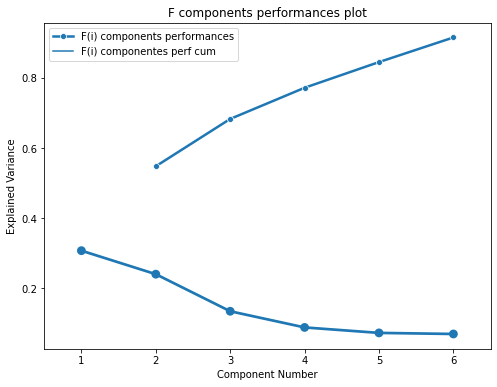

In [382]:
data_quality = []
nb_components = 6

(fig, ax) = plt.subplots(figsize=(8, 6))

# Fit du modele d'ACP avec 6 composantes
for i in range(2, nb_components+1):
    pca = PCA(n_components=i)
    data_standardized = pd.DataFrame(data_standardized, columns=features)
    pca.fit_transform(data_standardized)
    data_quality.append(pca.explained_variance_ratio_.sum())

data = pd.DataFrame(data_quality, index=[i for i in range(1,6)], columns=["F total quality (%)"])
sns.lineplot(data=data, palette="tab10", linewidth=2.5, marker='o')


ind = np.arange(0, nb_components)
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('F components performances plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind+1)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
ax.legend(["F(i) components performances","F(i) componentes perf cum"])
plt.show()

 **Note** : La pertinence des données projetées sur les nouveaux axes données par la variance expliqué :
 
 1. Les composantes **F1** et **F2** conservent **55%** des informations données par nos variables initiales
 2. Les composantes **F1**, **F2** et **F3** (axe 3D) conservent **70%** de l'information

## 3.3 Corrélation entre nos variables initiales et les composantes principales

In [383]:
#Décomposition linéaire des composantes principales

componentes_statistics = pd.DataFrame(pca.components_, columns=features, index=["F_"+str(i) for i in range(1,nb_components+1)]).join(pd.DataFrame(pca.explained_variance_ratio_, index=["F_"+str(i) for i in range(1,nb_components+1)], columns=["F quality (%)"]))
componentes_statistics

,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index,F quality (%)
F_1,-0.256592,0.459323,0.428643,0.265071,0.463752,-0.340312,0.268916,-0.124893,0.211186,-0.076119,0.307585
F_2,0.233936,0.336720,0.290441,-0.067732,0.358018,0.394632,-0.370578,0.162823,-0.403609,0.363728,0.240562
F_3,0.553079,0.074766,-0.024147,0.348311,0.007253,0.088678,0.390090,0.525756,-0.065471,-0.354708,0.134897
F_4,0.098552,0.057083,-0.229802,0.726215,-0.102574,0.229676,0.005182,-0.547982,-0.124871,0.166299,0.088811
F_5,-0.335351,0.080355,-0.126423,0.103443,0.013347,-0.204373,-0.250046,0.035107,-0.671589,-0.545588,0.073217
F_6,-0.355644,0.019337,-0.260469,0.332567,-0.090348,-0.270557,-0.025083,0.564488,-0.039803,0.540809,0.070155


**Note** :  
* Disponibilité intérieure, Production et les décès liés à la famine sont les variables dominantes dans le calcul de **F1**
* Dispo intérieure, Production et indice de gini sont les variables dominantes pour le calcul de **F2**

**Interprétation des nouvelles features** : (55% de l'information retranscrite par F1,F2)

* Le nouvel axe des abscisses F_1 représente les pays producteurs qui préviligient les échanges commerciaux 
* L'axe des ordonné régi par F_2 représentes les pays endeuillés par la famine et en sous développement 

**Note** : La composante **F3** met l'accent sur la croissance démographique, l'importation et l'impact carbone 

In [384]:
#pca = PCA(n_components=6)
nb_components=2
pca = PCA(n_components=nb_components)
reduced = pca.fit_transform(data_standardized)


for i in range(0, nb_components):
    training_set['PC' + str(i + 1)] = reduced[:, i]

In [385]:
training_set

,Country Name,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index,PC1,PC2
0,Afghanistan,0.031158,57.0,0.0,29.0,28.0,45.071499,0.116895,6.163893,-2.461111,0.000000,-1.974784,1.050153
1,South Africa,0.013211,2118.0,63.0,514.0,1667.0,42.427386,7.314787,2.826681,-0.112222,61.883333,1.453027,1.320487
2,Albania,-0.004316,47.0,0.0,38.0,13.0,4.336743,1.250816,2.925658,-0.080556,31.218182,0.116452,-1.014309
3,Algeria,0.016368,277.0,0.0,2.0,275.0,15.782289,3.021488,3.552981,-1.216667,34.366667,-0.602784,0.266833
4,Germany,0.001000,1739.0,646.0,842.0,1514.0,4.602917,9.940892,1.856720,0.850556,30.192857,3.805766,-1.086510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Zimbabwe,0.010421,76.0,0.0,6.0,69.0,59.878604,1.049610,2.840845,-0.983333,45.933333,-1.376689,1.131297
124,United Arab Emirates,0.062263,412.0,94.0,433.0,48.0,7.902506,25.056277,4.616374,0.832778,29.250000,0.905233,-1.741750
125,Ecuador,0.015842,341.0,0.0,0.0,340.0,15.858785,2.064149,3.599579,-0.522222,49.509524,-0.529756,0.482553
126,Ethiopia,0.026737,14.0,0.0,1.0,14.0,54.956260,0.078633,5.898699,-1.504444,34.520000,-2.056766,1.647262


In [386]:
reduced

array([[-1.97478362,  1.05015282],
       [ 1.45302733,  1.32048742],
       [ 0.11645238, -1.01430875],
       [-0.60278406,  0.26683331],
       [ 3.80576647, -1.08651025],
       [-1.45389429,  1.63111647],
       [ 0.17679877, -2.12035232],
       [ 1.80049096, -1.49654125],
       [ 0.03455165, -0.91208705],
       [ 1.67258124, -1.51381721],
       [ 0.91863188, -1.89499811],
       [-0.32848814, -0.41241207],
       [-1.04296954,  0.7328813 ],
       [ 0.60167631, -2.62125699],
       [ 1.89790808, -1.45896517],
       [-0.95064831,  0.54714597],
       [-0.25167054, -0.43581011],
       [-1.39655788,  0.98466137],
       [12.51637087,  9.80444964],
       [ 0.83956946, -1.53057446],
       [-1.8421368 ,  1.40702493],
       [ 0.8841997 , -1.38199437],
       [-0.94051645, -0.50351097],
       [-1.69853792,  1.34936488],
       [ 2.24870507, -1.43298676],
       [ 0.33742076,  1.67370241],
       [-0.27326463, -0.292681  ],
       [ 0.51625837, -1.60098086],
       [ 0.84696707,

/Users/amarcade/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


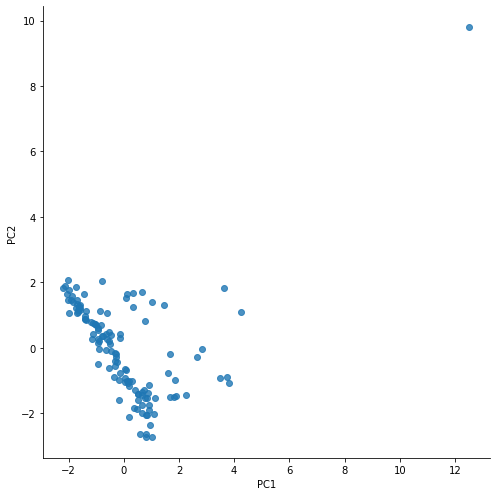

In [387]:
g = sns.lmplot('PC1',
               'PC2',
               data=training_set,
               fit_reg=False,
               scatter=True,
               height=7)

plt.show()

In [388]:
from mlxtend.plotting import plot_pca_correlation_graph

In [96]:
!pip install mlxtend

In [389]:
features

Index(['croissance demo', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité', 'Production',
       'unurished death cause (%)', 'CO2 emission (ton/capita)',
       'GDP_growth (%)', 'Political_Stability', 'gini index'],
      dtype='object')

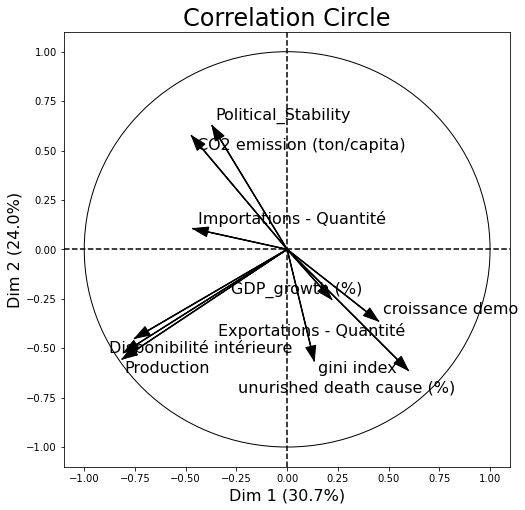

In [390]:
fig, correlation_matrix = plot_pca_correlation_graph(
    data_standardized, 
    features,
    dimensions=(1, 2),
    figure_axis_size=8
)

**Interprétation cercle de corrélation des composantes principales** :

* **F1** : nous montre d'un côté les pays polluant avec stable politiquement et de l'autre des pays qui souffrent de malnutrition avec une répartition des richesses très inégales. Les pays à droite de cet axe ont un marché agricole actif (Exportation, importation, production) -> pays riches / importeurs. Pays avec un gouvernement stable mais une forte émission en CO2

* **F2** : Pays Exportateur avec un marché agricole actif. Pays avec de forte inégalités sociales qui souffrent de sous-nutrition

In [391]:
correlation_matrix

,Dim 1,Dim 2
croissance demo,0.450013,-0.362836
Disponibilité intérieure,-0.805565,-0.522256
Exportations - Quantité,-0.751758,-0.450475
Importations - Quantité,-0.464883,0.105053
Production,-0.813333,-0.555289
unurished death cause (%),0.596842,-0.612077
CO2 emission (ton/capita),-0.471628,0.574769
GDP_growth (%),0.219038,-0.252540
Political_Stability,-0.370380,0.626001
gini index,0.133497,-0.564145


# 4. Clustering

## 4.1 Classification hiérarchique des pays

In [392]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [393]:
# distance between each cluster
# reduced : matrice de projection des points sur PC1 et PC2
data_standardized =  StandardScaler().fit_transform(reduced)
Z = linkage(data_standardized, method = 'complete')

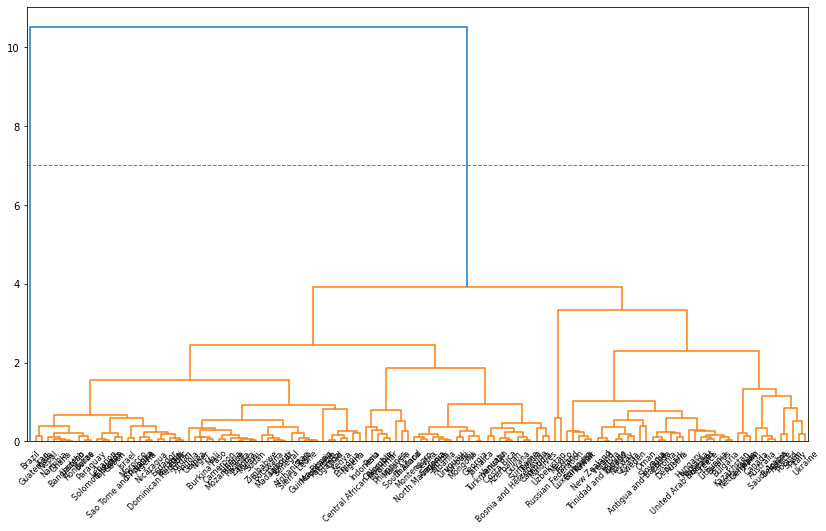

In [394]:
plt.subplots(figsize=(14,8))
leaf_labels = training_set["Country Name"].values
dendrogram(Z, leaf_rotation=45, leaf_font_size=8, color_threshold=7, labels=leaf_labels)
plt.axhline(y=7, c='grey', lw=1, linestyle='dashed')
plt.show()

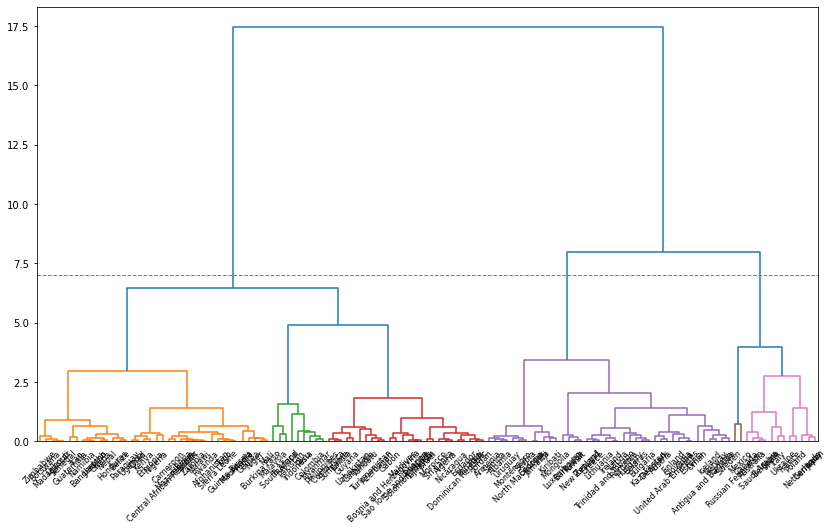

In [438]:
# Suppression des outliers : Le Brésil
outlier_index = training_set.loc[training_set["Country Name"] == "Brazil"].index.values
training_set.drop(index=outlier_index, inplace=True)

# Standardiser les data
PC_features = ["PC1","PC2"]
x = training_set.loc[:, PC_features].values

data_standardized = StandardScaler().fit_transform(x)
nb_components=2
pca = PCA(n_components=nb_components)
reduced = pca.fit_transform(data_standardized)

Z = linkage(data_standardized, method="ward")

# Nouveau dendrogramme

plt.subplots(figsize=(14,8))

leaf_labels = training_set["Country Name"].values
dendrogram(Z, leaf_rotation=45, leaf_font_size=8, color_threshold=3.5, labels=leaf_labels)
plt.axhline(y=7, c='grey', lw=1, linestyle='dashed')
plt.show()

In [398]:
cluster_assignation = fcluster(Z, t=1.5, criterion="distance")
training_set["hierarchical_clustering_labels"] = cluster_assignation

## 4.1.2 Déterminer le seuil de distance optimale

In [424]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [431]:
PC_features = ["PC1","PC2"]
X = training_set[PC_features] 

In [432]:
# Coefficient de silhouette
# CS = 0 : Le point proche de la frontière de décision avec le cluster le plus proche
# CS proche de 1 : Le point est dans le bon cluster
silhouette_score(X,cluster_assignation)

-0.0022217012526753225

In [435]:
distance_threshold_range = np.linspace(1,5,20)
Z = linkage(data_standardized, 'ward')
s_score = []
nb_clusters=[]
# Calcul du score silhouette pour chacune des valeurs de t
for threshold in distance_threshold_range:
    labels = fcluster(Z,t=threshold,criterion="distance")
    nb_cluster = len(np.unique(labels))
    silhouet_score = silhouette_score(X,labels)
    s_score.append(silhouet_score)
    nb_clusters.append(nb_cluster)


# plotting du résultat
array = np.transpose(np.array([distance_threshold_range,nb_clusters,s_score]))
data = pd.DataFrame(array, columns=["threshold_distance","nb_clusters","s_score"])


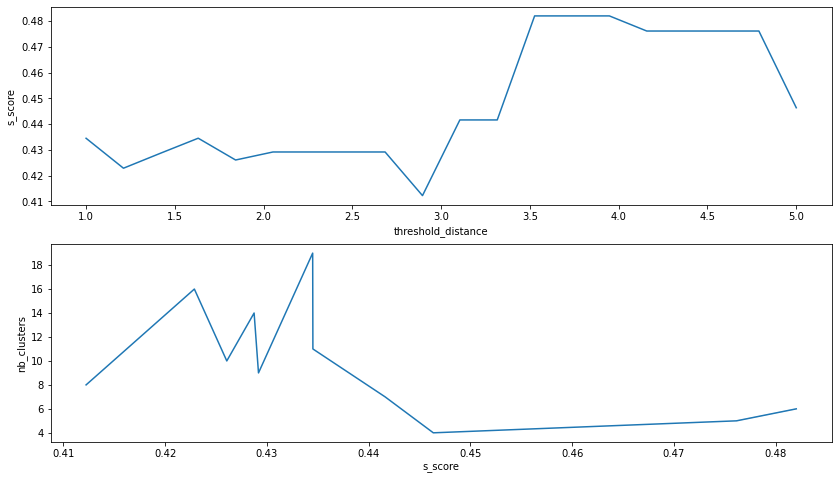

In [436]:
fig, ax = plt.subplots(2,1, figsize=(14,8))
sns.lineplot(data=data, x="threshold_distance", y="s_score", ax=ax[0])
sns.lineplot(data=data, x="s_score", y="nb_clusters", ax=ax[1])
plt.show()

Le choix de la distance **t** utilisée pour catégoriser nos observations doit **maximiser** le silhouette score.
Pour la classification hierarchique, nous allons utiliser les hyperparamètres optimisés suivant : 

* Distance d'appartenance à un cluster : **t < 3.5**
* Nombre de cluster optimal : **nb_cluster = 6**

## 4.2.3 Projection des clusters sur les axes PC1, PC2

/Users/amarcade/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


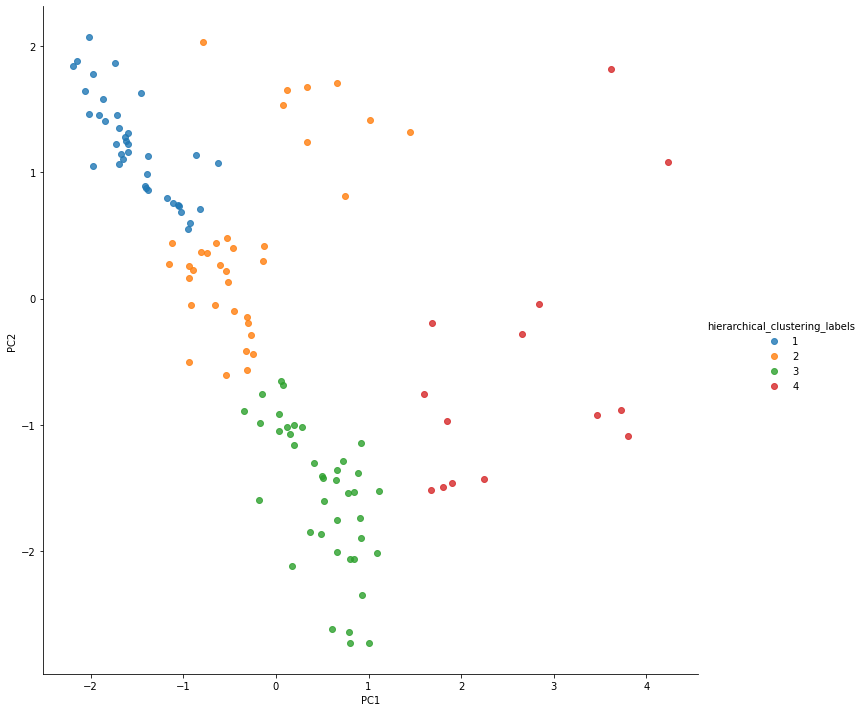

In [437]:
# Le nombre de cluster est de 6 avec un seuil t = 5
cluster_assignation = fcluster(Z, t=5, criterion="distance")
training_set["hierarchical_clustering_labels"] = cluster_assignation

# Visualisation des clusters sur les axes de projection PC1,PC2

g = sns.lmplot('PC1',
               'PC2',
               data=training_set,
               hue="hierarchical_clustering_labels",
               fit_reg=False,
               scatter=True,
               height=10)

plt.show()

## 4.2.4 Labellisation des clusters 

In [364]:
training_set.head(5)

,Country Name,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index,PC1,PC2,hierarchical_clustering_labels
0,Afghanistan,0.031158,57.0,0.0,29.0,28.0,45.071499,0.116895,6.163893,-2.461111,0.000000,-1.974784,1.050153,1
1,South Africa,0.013211,2118.0,63.0,514.0,1667.0,42.427386,7.314787,2.826681,-0.112222,61.883333,1.453027,1.320487,2
2,Albania,-0.004316,47.0,0.0,38.0,13.0,4.336743,1.250816,2.925658,-0.080556,31.218182,0.116452,-1.014309,4
3,Algeria,0.016368,277.0,0.0,2.0,275.0,15.782289,3.021488,3.552981,-1.216667,34.366667,-0.602784,0.266833,3
4,Germany,0.001000,1739.0,646.0,842.0,1514.0,4.602917,9.940892,1.856720,0.850556,30.192857,3.805766,-1.086510,6


In [368]:

training_set[features]#.groupby(by=["hierarchical_clustering_labels"])

,croissance demo,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,unurished death cause (%),CO2 emission (ton/capita),GDP_growth (%),Political_Stability,gini index,PC1,PC2,hierarchical_clustering_labels
0,0.031158,57.0,0.0,29.0,28.0,45.071499,0.116895,6.163893,-2.461111,0.000000,-1.974784,1.050153,1
1,0.013211,2118.0,63.0,514.0,1667.0,42.427386,7.314787,2.826681,-0.112222,61.883333,1.453027,1.320487,2
2,-0.004316,47.0,0.0,38.0,13.0,4.336743,1.250816,2.925658,-0.080556,31.218182,0.116452,-1.014309,4
3,0.016368,277.0,0.0,2.0,275.0,15.782289,3.021488,3.552981,-1.216667,34.366667,-0.602784,0.266833,3
4,0.001000,1739.0,646.0,842.0,1514.0,4.602917,9.940892,1.856720,0.850556,30.192857,3.805766,-1.086510,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.010421,76.0,0.0,6.0,69.0,59.878604,1.049610,2.840845,-0.983333,45.933333,-1.376689,1.131297,1
124,0.062263,412.0,94.0,433.0,48.0,7.902506,25.056277,4.616374,0.832778,29.250000,0.905233,-1.741750,4
125,0.015842,341.0,0.0,0.0,340.0,15.858785,2.064149,3.599579,-0.522222,49.509524,-0.529756,0.482553,3
126,0.026737,14.0,0.0,1.0,14.0,54.956260,0.078633,5.898699,-1.504444,34.520000,-2.056766,1.647262,1


In [107]:
# Elaborer des indicateurx autour des clusters (moyen, médiane, ecart-type) 
# pour aider à l'interprétation de chaque cluster (visuel heatmap) 

## 4.2 Kmeans